## <font size=5> <strong>News Quality Prediction
 


## I. Importing essential libraries

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# to make this notebook's output stable across runs
np.random.seed(42)
from sklearn.metrics import confusion_matrix, f1_score

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

pd.options.display.max_columns
pd.set_option("display.max_columns",100)

## II. Importing and understanding our dataset 

In [152]:
dataset = pd.read_csv("../data/low_high_features2.csv")

#### Shape of dataset

In [153]:
dataset.shape

(1062, 61)

#### Printing out a few columns

In [154]:
dataset.head(5)

,Difficulty,Mistakes,Length,Capitals in article,Title Polarity,Dominance,No Celebs,Diversity,Inspired,Valence,Arousal,Afraid,Joy intensity,Anticipation,Strong subjectivity,first_person,Adjectives,I do not care,Amused,Sad_,Surprise,Annoyed,Numbers,Noimages,Afinnity,Trust,Sadness,Happy,Fear intensity,Disgust,Sadness intensity,Positivity,Anger intensity,Entertainment,No Crime,No Sensual,No Animals,cursing,img/word,#title_words,hdd,Sentence length,msttr,mtld,negativity_vader,neutrality_vader,stopwords,uniq_wds,positivity_vader,avg_word,Joy,subjectivity,Fear,Anger,negative,char_count,Weak subjectivity,density,cadence,Polarity,quality
0,41.0,0.999450,647.0,0.0,0.165,0.546399,2.0,7.0,13.473054,0.582296,0.444565,8.383234,0.080775,8.982036,0.052469,375.579598,0.516229,6.586826,11.676647,5.688623,0.299401,2.694611,10.0,9.0,2.0,5.389222,3.592814,10.778443,0.142975,2.694611,0.146075,11.377246,0.151125,4.0,1.0,0.0,1.0,0,0.013910,18.0,0.393814,5.113982,0.536579,13.135889,0.082,0.836,233.0,334.0,0.082,5.113982,1.197605,0.431594,4.491018,5.389222,8.383234,3893.0,0.083333,19.760479,0.173077,0.4276,1
1,38.0,1.000000,1112.0,0.0,0.375,0.583286,2.0,11.0,8.955224,0.604367,0.439169,7.675906,0.193565,6.183369,0.041367,310.251799,0.421763,8.315565,9.594883,4.690832,2.132196,7.462687,13.0,1.0,72.0,13.006397,6.823028,10.234542,0.091532,1.066098,0.069129,16.204691,0.021226,2.0,0.0,0.0,0.0,0,0.000899,12.0,0.398931,5.070410,0.545174,13.640367,0.056,0.754,421.0,469.0,0.190,5.070410,4.264392,0.475748,3.198294,1.066098,10.874200,6614.0,0.095324,27.078891,0.019231,0.9995,1
2,40.0,0.999861,1358.0,0.0,0.000,0.594242,2.0,16.0,9.667195,0.579638,0.464974,8.874802,0.156884,4.754358,0.054452,434.462445,0.464654,6.180666,7.606973,5.071315,2.852615,4.595880,5.0,2.0,-13.0,13.787639,3.011094,13.312203,0.218907,1.743265,0.062605,16.798732,0.125570,14.0,9.0,0.0,3.0,0,0.001473,9.0,0.392098,5.155474,0.531787,13.185836,0.081,0.819,489.0,631.0,0.100,5.155474,3.486529,0.435050,7.765452,3.961965,10.301109,8126.0,0.094187,27.099842,0.019231,0.9662,1
3,49.0,0.999872,1543.0,0.0,0.000,0.566749,0.0,3.0,10.374150,0.595911,0.455193,10.544218,0.183640,6.972789,0.036246,315.618924,0.381076,8.843537,8.503401,6.632653,4.421769,4.421769,4.0,4.0,42.0,12.244898,4.251701,13.775510,0.143416,1.020408,0.117562,15.986395,0.085944,4.0,3.0,0.0,1.0,0,0.002592,10.0,0.389079,4.818535,0.530983,13.042175,0.060,0.781,645.0,588.0,0.159,4.818535,3.911565,0.431330,5.952381,4.421769,11.054422,8775.0,0.082848,27.040816,0.038462,0.9995,1
4,48.0,1.000000,1090.0,0.0,0.100,0.588103,0.0,10.0,12.418301,0.630723,0.439720,9.803922,0.157134,8.496732,0.032110,377.064220,0.421101,9.803922,7.189542,5.664488,3.267974,3.921569,6.0,2.0,-4.0,12.200436,4.139434,13.943355,0.155612,2.832244,0.125910,18.954248,0.113955,1.0,1.0,0.0,0.0,0,0.001835,9.0,0.394401,4.988095,0.535806,13.360777,0.087,0.781,442.0,459.0,0.132,4.988095,5.664488,0.475041,5.446623,4.575163,8.278867,6365.0,0.074312,27.233115,0.019231,0.9952,1


In [155]:
dataset.sample(5)

,Difficulty,Mistakes,Length,Capitals in article,Title Polarity,Dominance,No Celebs,Diversity,Inspired,Valence,Arousal,Afraid,Joy intensity,Anticipation,Strong subjectivity,first_person,Adjectives,I do not care,Amused,Sad_,Surprise,Annoyed,Numbers,Noimages,Afinnity,Trust,Sadness,Happy,Fear intensity,Disgust,Sadness intensity,Positivity,Anger intensity,Entertainment,No Crime,No Sensual,No Animals,cursing,img/word,#title_words,hdd,Sentence length,msttr,mtld,negativity_vader,neutrality_vader,stopwords,uniq_wds,positivity_vader,avg_word,Joy,subjectivity,Fear,Anger,negative,char_count,Weak subjectivity,density,cadence,Polarity,quality
31,39.0,1.0,751.0,0.0,0.500000,0.627942,0.0,5.0,12.256267,0.575567,0.493679,11.699164,0.152098,4.456825,0.030626,370.173103,0.478029,5.849582,6.128134,4.735376,1.949861,2.785515,2.0,5.0,-20.0,15.598886,5.292479,7.520891,0.284115,4.178273,0.110770,17.548747,0.149803,10.0,9.0,0.0,1.0,0,0.006658,11.0,0.389871,5.185923,0.536497,13.266589,0.145,0.735,272.0,359.0,0.120,5.185923,1.949861,0.384872,13.370474,8.077994,11.420613,4532.0,0.063915,28.969359,0.019231,0.9829,1
413,39.0,1.0,930.0,0.0,0.000000,0.586135,0.0,11.0,5.837563,0.563678,0.470668,8.629442,0.135879,4.060914,0.033298,398.924731,0.423656,7.360406,4.822335,3.553299,2.030457,4.568528,2.0,2.0,-68.0,16.243655,5.329949,6.852792,0.241052,4.060914,0.116931,14.720812,0.156914,23.0,18.0,0.0,5.0,0,0.002151,11.0,0.388927,5.250538,0.528649,13.284010,0.161,0.733,371.0,394.0,0.106,5.250538,3.045685,0.406766,12.944162,7.614213,14.213198,5687.0,0.079484,28.934010,0.038462,0.9971,1
536,74.0,1.0,366.0,1.0,-0.291667,0.480754,0.0,1.0,9.595960,0.473685,0.487354,10.606061,0.052810,7.070707,0.027322,292.349727,0.540984,15.151515,5.050505,11.111111,3.030303,4.040404,2.0,3.0,-51.0,3.535354,8.080808,11.616162,0.334524,3.535354,0.204143,5.050505,0.182976,6.0,6.0,0.0,0.0,0,0.008197,14.0,0.395625,4.376344,0.532800,12.730511,0.219,0.693,143.0,198.0,0.088,4.376344,2.525253,0.298431,13.131313,8.585859,16.161616,1926.0,0.112022,21.212121,0.211538,0.9954,0
960,74.0,1.0,668.0,7.0,0.000000,0.517338,0.0,3.0,14.189189,0.568586,0.459883,12.500000,0.153103,5.405405,0.049401,326.347305,0.443114,9.797297,12.500000,7.094595,4.391892,5.743243,0.0,3.0,-5.0,5.743243,8.108108,14.527027,0.274017,2.702703,0.204966,9.797297,0.099000,5.0,2.0,2.0,1.0,0,0.004491,13.0,0.391520,4.333333,0.532941,12.957587,0.098,0.781,293.0,296.0,0.121,4.333333,4.729730,0.474721,10.472973,5.743243,10.135135,3442.0,0.080838,19.932432,0.019231,0.9550,0
793,54.0,1.0,325.0,1.0,0.500000,0.497897,0.0,0.0,8.163265,0.546234,0.497963,6.122449,0.223382,7.142857,0.055385,298.461538,0.603077,6.122449,9.183673,4.591837,3.061224,3.061224,0.0,7.0,-14.0,5.102041,6.632653,7.653061,0.184647,2.040816,0.233882,10.204082,0.140706,9.0,3.0,5.0,1.0,0,0.021538,14.0,0.395077,4.518293,0.537971,13.436705,0.150,0.707,135.0,196.0,0.143,4.518293,5.612245,0.510615,4.591837,4.591837,9.183673,1758.0,0.073846,19.387755,0.096154,0.6902,0


#### Description

In [156]:
dataset.describe()

,Difficulty,Mistakes,Length,Capitals in article,Title Polarity,Dominance,No Celebs,Diversity,Inspired,Valence,Arousal,Afraid,Joy intensity,Anticipation,Strong subjectivity,first_person,Adjectives,I do not care,Amused,Sad_,Surprise,Annoyed,Numbers,Noimages,Afinnity,Trust,Sadness,Happy,Fear intensity,Disgust,Sadness intensity,Positivity,Anger intensity,Entertainment,No Crime,No Sensual,No Animals,cursing,img/word,#title_words,hdd,Sentence length,msttr,mtld,negativity_vader,neutrality_vader,stopwords,uniq_wds,positivity_vader,avg_word,Joy,subjectivity,Fear,Anger,negative,char_count,Weak subjectivity,density,cadence,Polarity,quality
count,1060.000000,1060.000000,1060.000000,1060.000000,1062.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1062.000000,1060.000000,1062.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1062.000000
mean,52.348113,0.999238,711.466981,0.439623,-0.014396,0.553344,0.760377,4.794340,12.172601,0.581061,0.470316,9.777948,0.180540,5.857667,0.039953,344.085686,0.501046,8.231007,9.034648,7.360969,2.890326,4.001410,3.664151,6.850943,-18.640566,9.004798,4.504533,11.588590,0.207600,2.494061,0.143946,12.233559,0.135570,7.157547,4.110377,1.087736,1.199057,0.058380,0.013736,15.110169,0.394111,4.905417,0.535883,13.253651,0.104008,0.800042,276.426415,324.707547,0.095932,4.905417,3.866046,0.413400,6.867051,4.891597,9.328689,4128.513208,0.065139,21.562249,0.077268,0.906783,0.449153
std,12.145582,0.004268,528.414944,2.087585,0.249915,0.038732,1.562405,4.027662,3.992150,0.045588,0.029887,3.606251,0.097204,2.549445,0.015997,50.890783,0.078753,3.308789,3.268002,3.488469,1.881937,1.856761,4.104908,11.824753,39.041080,4.073279,2.775402,3.682302,0.111171,1.756308,0.084940,4.565220,0.087735,7.780674,5.859230,2.627457,3.233880,0.416869,0.029162,6.879610,0.005895,0.294429,0.007523,0.293785,0.055197,0.054752,203.712158,181.811401,0.043516,0.294429,2.438485,0.082234,4.110075,3.191169,4.047942,3133.064329,0.018129,6.123085,0.112564,0.188824,0.497642
min,9.000000,0.891586,113.000000,0.000000,-1.000000,0.436320,0.000000,0.000000,2.127660,0.415016,0.368219,0.854701,0.000000,0.000000,0.000000,214.634146,0.285149,0.709220,0.653595,0.495050,0.000000,0.000000,0.000000,0.000000,-263.000000,0.000000,0.000000,1.818182,0.000000,0.000000,0.000000,0.636943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.378614,4.097270,0.512857,12.415243,0.000000,0.588000,42.000000,80.000000,0.000000,4.097270,0.000000,0.102381,0.000000,0.000000,0.000000,626.000000,0.008403,4.040404,0.019231,0.002700,0.000000
25%,43.000000,0.999550,359.000000,0.000000,-0.062500,0.523473,0.000000,2.000000,9.375000,0.553059,0.450705,7.373278,0.110554,4.105298,0.029289,310.251176,0.444517,5.795703,6.896552,4.876069,1.587302,2.737275,1.000000,2.000000,-36.000000,6.121557,2.408687,9.038697,0.123005,1.187532,0.079549,8.959550,0.067619,2.000000,0.000000,0.000000,0.000000,0.000000,0.002703,11.000000,0.390172,4.707474,0.531051,13.066328,0.064000,0.766000,141.000000,197.750000,0.065000,4.707474,2.126405,0.363465,3.764117,2.497407,6.288410,2020.750000,0.052830,17.208012,0.019231,0.928575,0.000000
50%,53.000000,1.000000,542.000000,0.000000,0.000000,0.554243,0.000000,4.000000,11.702715,0.580891,0.469194,9.248183,0.164492,5.575844,0.038933,342.155627,0.497891,7.692308,8.712247,6.879648,2.621236,3.883495,2.000000,4.000000,-15.000000,8.541329,3.976854,11.111111,0.194657,2.222222,0.130619,11.991736,0.121253,5.000000,2.000000,0.000000,0.000000,

In [158]:
dataset.isnull().any()

Difficulty              True
Mistakes                True
Length                  True
Capitals in article     True
Title Polarity         False
                       ...  
Weak subjectivity       True
density                 True
cadence                 True
Polarity                True
quality                False
Length: 61, dtype: bool

In [281]:
dataset[dataset.isna().any(axis=1)]

,Difficulty,Mistakes,Length,Title Polarity,Diversity,Inspired,Joy intensity,Anticipation,Strong subjectivity,first_person,Adjectives,Annoyed,Numbers,Trust,Fear intensity,Disgust,Sadness intensity,Anger intensity,No Crime,No Sensual,No Animals,No Celebs,img/word,#title_words,quality


In [160]:
dataset.isnull().sum().sum()

114

In [161]:
dataset= dataset.dropna()

In [163]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 1061
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Difficulty           1060 non-null   float64
 1   Mistakes             1060 non-null   float64
 2   Length               1060 non-null   float64
 3   Capitals in article  1060 non-null   float64
 4   Title Polarity       1060 non-null   float64
 5   Dominance            1060 non-null   float64
 6   No Celebs            1060 non-null   float64
 7   Diversity            1060 non-null   float64
 8   Inspired             1060 non-null   float64
 9   Valence              1060 non-null   float64
 10  Arousal              1060 non-null   float64
 11  Afraid               1060 non-null   float64
 12  Joy intensity        1060 non-null   float64
 13  Anticipation         1060 non-null   float64
 14  Strong subjectivity  1060 non-null   float64
 15  first_person         1060 non-null   f

In [164]:
dataset = dataset[[ 'Difficulty', 'Mistakes', 'Length', 
       'Title Polarity', 'Diversity', 'Inspired',       
                   'Joy intensity', 'Anticipation',
       'Strong subjectivity', 'first_person', 
                   'Adjectives', 
                   'Annoyed', 'Numbers',
                   'Trust', 
                   'Fear intensity',
       'Disgust', 'Sadness intensity', 
                   'Anger intensity',
                   'No Crime', 'No Sensual', 'No Animals','No Celebs',
                   'img/word', 
                   '#title_words', 

                   'quality'] 
        ].copy()

#### Let's understand our columns better:

#### Analysing the 'target' variable

In [166]:
dataset["quality"].describe()

count    1060.000000
mean        0.450000
std         0.497729
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: quality, dtype: float64

In [167]:
dataset["quality"].unique()

array([1, 0])

### Checking correlation between columns

In [168]:
print(dataset.corr()["quality"].abs().sort_values(ascending=False))

quality                1.000000
Difficulty             0.601707
Diversity              0.554933
Length                 0.529222
Trust                  0.503053
Adjectives             0.483819
first_person           0.458773
Numbers                0.425295
No Celebs              0.319719
No Crime               0.276635
Joy intensity          0.268241
#title_words           0.237232
Annoyed                0.189595
Anticipation           0.170727
Inspired               0.157616
Title Polarity         0.131154
Strong subjectivity    0.124225
Fear intensity         0.107327
Anger intensity        0.083260
img/word               0.083024
No Sensual             0.063433
Sadness intensity      0.044867
Disgust                0.029322
Mistakes               0.012151
No Animals             0.002376
Name: quality, dtype: float64


### This shows that most columns are moderately correlated with target.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

0    583
1    477
Name: quality, dtype: int64


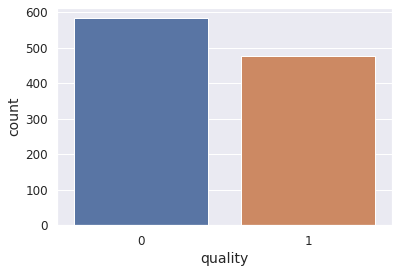

In [170]:
y = dataset["quality"]

sns.countplot(y)


target_temp = dataset.quality.value_counts()

print(target_temp)

## IV. Train Test split

In [171]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("quality",axis=1)
target = dataset["quality"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

## V. Model Fitting

In [172]:
from sklearn.metrics import accuracy_score, classification_report

### Logistic Regression

In [173]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [174]:
Y_pred_lr.shape

(212,)

In [175]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 91.51 %


In [176]:
f1_score(Y_test, Y_pred_lr, average='weighted')

0.9144397894665012

In [177]:
print('Classification Report\n', classification_report(Y_test, Y_pred_lr))

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       130
           1       0.92      0.85      0.89        82

    accuracy                           0.92       212
   macro avg       0.92      0.90      0.91       212
weighted avg       0.92      0.92      0.91       212



### Naive Bayes

In [178]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [179]:
Y_pred_nb.shape

(212,)

In [180]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 88.21 %


In [181]:
f1_score(Y_test, Y_pred_nb, average='weighted')

0.8806245715177831

In [182]:
print('Classification Report\n', classification_report(Y_test, Y_pred_nb))

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       130
           1       0.89      0.79      0.84        82

    accuracy                           0.88       212
   macro avg       0.88      0.87      0.87       212
weighted avg       0.88      0.88      0.88       212



### SVM

In [183]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [184]:
Y_pred_svm.shape

(212,)

In [185]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 92.45 %


In [186]:
f1_score(Y_test, Y_pred_svm, average='weighted')

0.923719573395721

In [187]:
print('Classification Report\n', classification_report(Y_test, Y_pred_svm))

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       130
           1       0.95      0.85      0.90        82

    accuracy                           0.92       212
   macro avg       0.93      0.91      0.92       212
weighted avg       0.93      0.92      0.92       212



### K Nearest Neighbors

In [188]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [189]:
Y_pred_knn.shape

(212,)

In [190]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 85.85 %


In [191]:
f1_score(Y_test, Y_pred_knn, average='weighted')

0.8595353016151612

In [192]:
print('Classification Report\n', classification_report(Y_test, Y_pred_knn))

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       130
           1       0.79      0.87      0.83        82

    accuracy                           0.86       212
   macro avg       0.85      0.86      0.85       212
weighted avg       0.86      0.86      0.86       212



### Decision Tree

In [193]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(2000):
    dt = DecisionTreeClassifier(random_state=x, max_depth = 8)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [194]:
print(Y_pred_dt.shape)

(212,)


In [195]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 83.02 %


In [196]:
f1_score(Y_test, Y_pred_dt, average='weighted')

0.8305534555950878

In [296]:
print('Classification Report\n', classification_report(Y_test, Y_pred_dt))

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       130
           1       0.77      0.79      0.78        82

    accuracy                           0.83       212
   macro avg       0.82      0.82      0.82       212
weighted avg       0.83      0.83      0.83       212



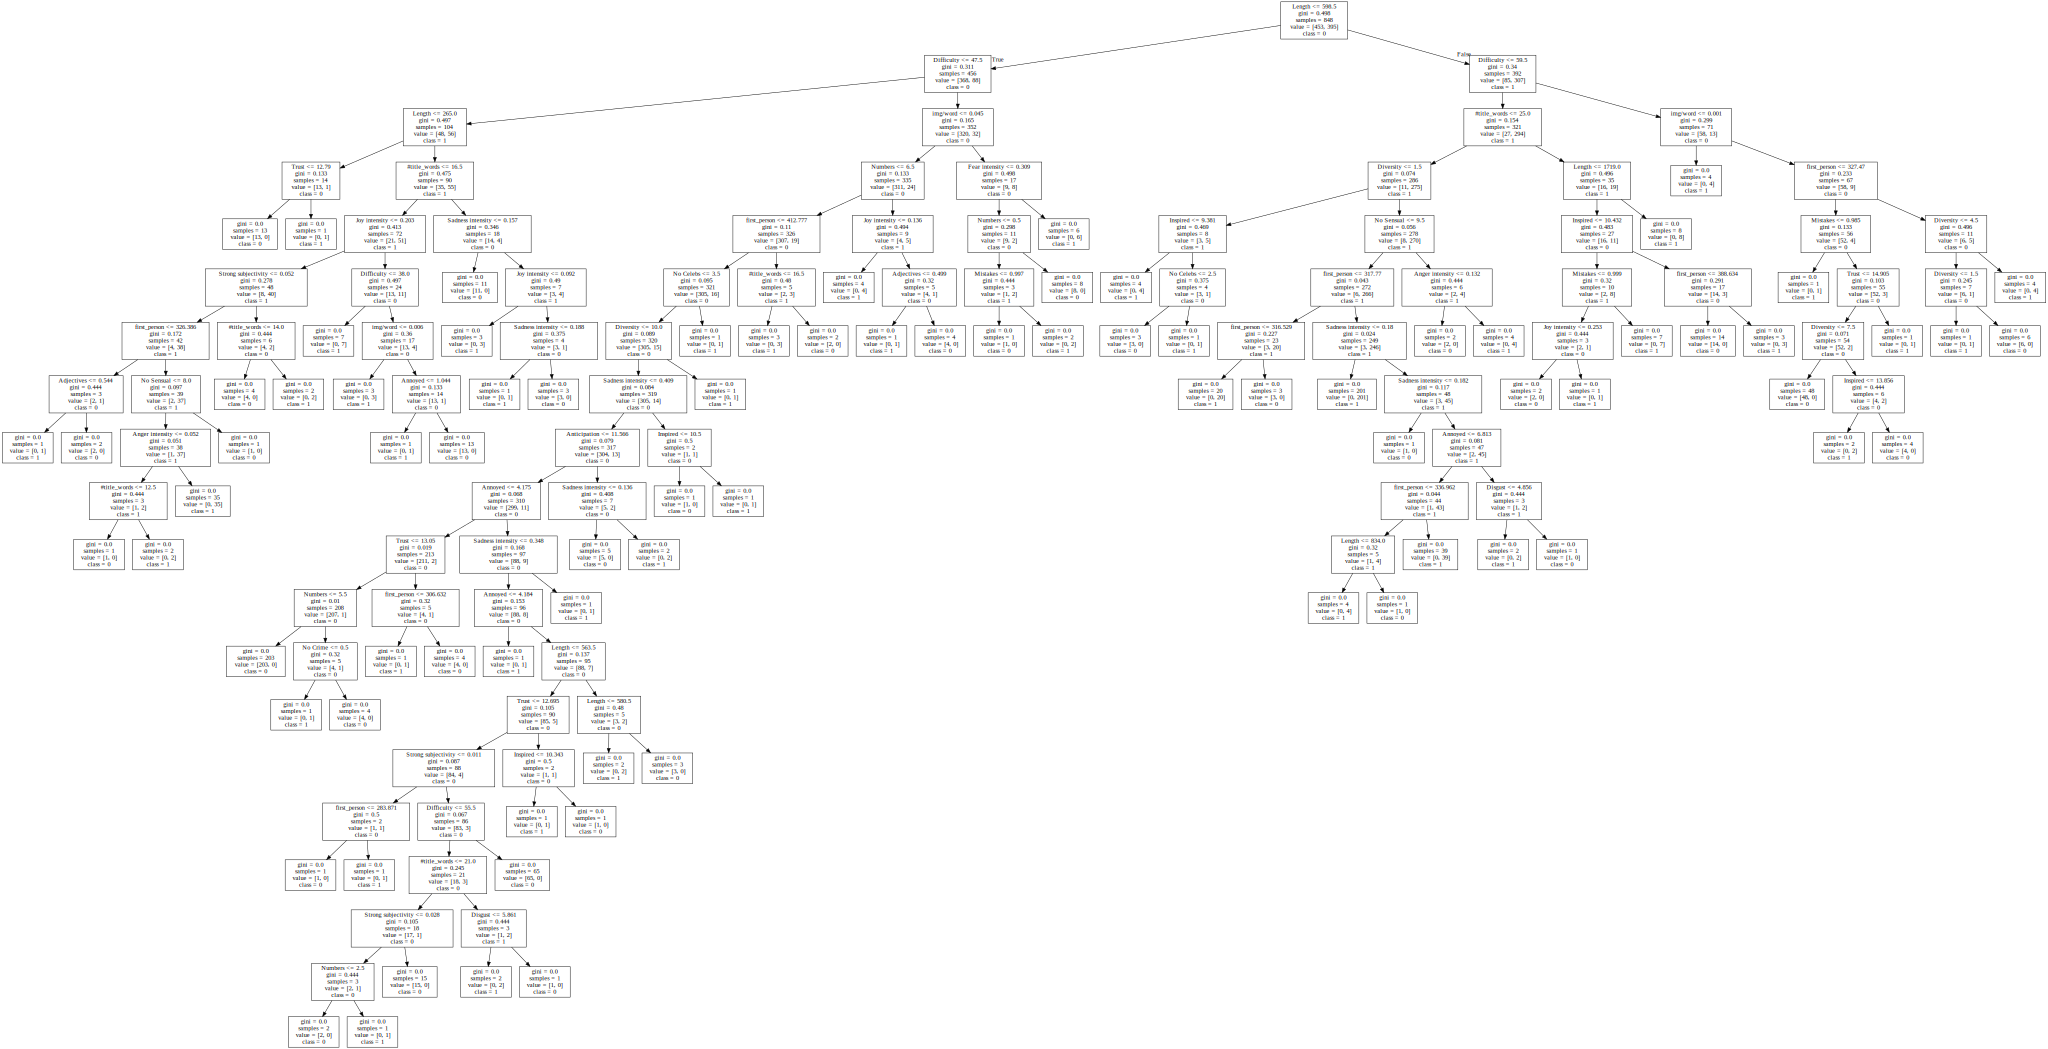

In [198]:
#visualise the tree 
#!apt-get install graphviz
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source
from sklearn import tree
graph = Source(tree.export_graphviz(dt, out_file=None,feature_names=predictors.columns, class_names=["0", "1"]))
png_bytes = graph.pipe(format='png')
with open('tree_pipe.png','wb') as f:
    f.write(png_bytes)

graph

In [199]:
fi = pd.DataFrame(dt.feature_importances_, X_train.columns)
fi.columns = ['Importance']
fi.sort_values(by = 'Importance', ascending=False)[0:20]

,Importance
Length,0.387092
Difficulty,0.239441
#title_words,0.061748
first_person,0.050928
img/word,0.035704
Inspired,0.027991
Sadness intensity,0.027841
Joy intensity,0.025133
Diversity,0.024470
Numbers,0.018944


### Random Forest

In [333]:
rf = RandomForestClassifier(n_estimators=30000, min_samples_leaf=6, max_features=0.5,
                          n_jobs=-1, oob_score=True)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [334]:
f1_score(Y_test, Y_pred_rf, average='weighted')

0.9283747429106697

In [335]:
print('Classification Report\n', classification_report(Y_test, Y_pred_rf))

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       130
           1       0.96      0.85      0.90        82

    accuracy                           0.93       212
   macro avg       0.94      0.92      0.92       212
weighted avg       0.93      0.93      0.93       212



In [336]:
fi = pd.DataFrame(rf.feature_importances_, X_train.columns)
fi.columns = ['Importance']
fi.sort_values(by = 'Importance', ascending=False)[0:20]

,Importance
Difficulty,0.276736
Length,0.270723
img/word,0.109154
first_person,0.052888
Diversity,0.051357
Adjectives,0.037005
Numbers,0.032407
#title_words,0.030082
Trust,0.028142
Joy intensity,0.017135


### XGBoost

In [249]:
#1 
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [257]:
f1_score(Y_test, Y_pred_xgb, average='weighted')

0.9241566609491139

In [258]:
#2
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
xgb_model.fit(X_train, Y_train, early_stopping_rounds=5, eval_set=[(X_test, Y_test)])

Y_pred_xgb = xgb_model.predict(X_test)

[0]	validation_0-auc:0.92519
[1]	validation_0-auc:0.93907
[2]	validation_0-auc:0.93734
[3]	validation_0-auc:0.95000
[4]	validation_0-auc:0.95647
[5]	validation_0-auc:0.96130
[6]	validation_0-auc:0.96365
[7]	validation_0-auc:0.96243
[8]	validation_0-auc:0.96970
[9]	validation_0-auc:0.97317
[10]	validation_0-auc:0.97176
[11]	validation_0-auc:0.97364
[12]	validation_0-auc:0.97467
[13]	validation_0-auc:0.97495
[14]	validation_0-auc:0.97711
[15]	validation_0-auc:0.97711
[16]	validation_0-auc:0.97814
[17]	validation_0-auc:0.97871
[18]	validation_0-auc:0.97833
[19]	validation_0-auc:0.97917
[20]	validation_0-auc:0.98068
[21]	validation_0-auc:0.98171
[22]	validation_0-auc:0.98161
[23]	validation_0-auc:0.98218
[24]	validation_0-auc:0.98077
[25]	validation_0-auc:0.98096
[26]	validation_0-auc:0.98124
[27]	validation_0-auc:0.98096


In [259]:
Y_pred_xgb.shape

(212,)

In [260]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 92.45 %


In [261]:
f1_score(Y_test, Y_pred_xgb, average='weighted')

0.9241566609491139

In [262]:
print('Classification Report\n', classification_report(Y_test, Y_pred_xgb))

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       130
           1       0.92      0.88      0.90        82

    accuracy                           0.92       212
   macro avg       0.92      0.92      0.92       212
weighted avg       0.92      0.92      0.92       212



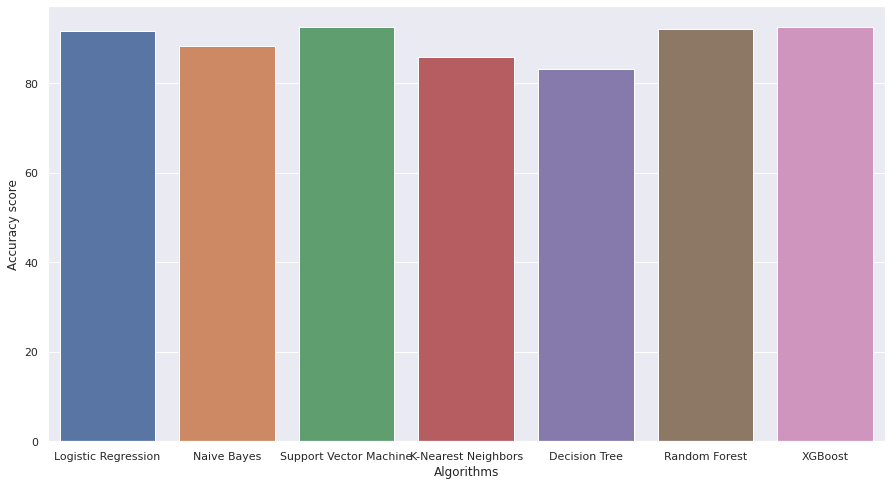

In [217]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## Explanations

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[124   6]
 [ 10  72]]


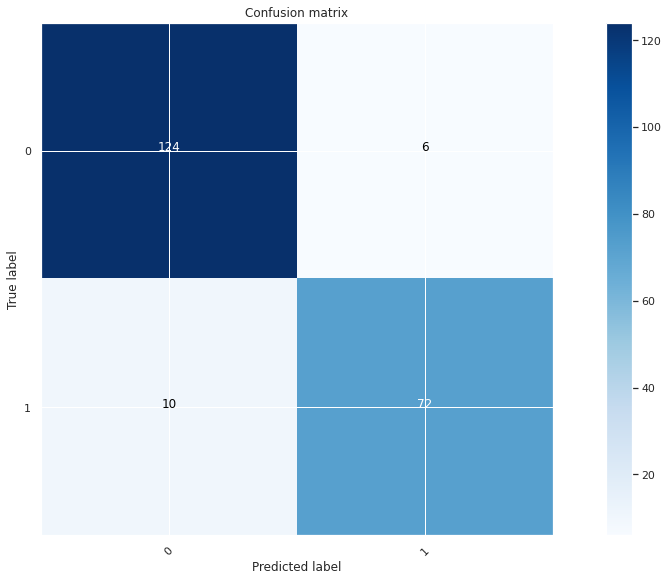

In [266]:
import eli5
from eli5.sklearn import PermutationImportance
# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_train, train_pred)
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score




def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix = confusion_matrix(Y_test, Y_pred_xgb)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=xgb_model.classes_,
                      title='Confusion matrix')


### Find a random news story correctly classified as low quality

In [289]:
eli5.explain_prediction(rf, dataset[X_train.columns].iloc[704])

Explanation(estimator="RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n                       criterion='gini', max_depth=None, max_features=0.6,\n                       max_leaf_nodes=None, max_samples=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=4, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, n_estimators=20000,\n                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,\n                       warm_start=False)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.534327004716986, std=None, value=1.0), FeatureWeight(feature='Length', weight=0.15964136904152348, std=None, value=282.0), FeatureWeight(feature='Difficulty', weight=0.1582745343513908, std=None, value=70.0), FeatureWeight(feature='img/word', weight=0.033334532308412435, std=None, value=0.024822695035460998), FeatureWeight(feature='Diversity', weight=0.02193391921761373, std=None, value=3.0), FeatureWeight(feature='Numbers', weight=0.013635952578628582, std=None, value=3.0), FeatureWeight(feature='first_person', weight=0.01288132711557596, std=None, value=326.241134751773), FeatureWeight(feature='Trust', weight=0.009145545091138518, std=None, value=3.4285714285714306), FeatureWeight(feature='Strong subjectivity', weight=0.00722422445831425, std=None, value=0.0709219858156028), FeatureWeight(feature='#title_words', weight=0.006353334406840194, std=None, value=15.0), FeatureWeight(feature='No Celebs', weight=0.006317521714992159, std=None, value=0.0), FeatureWeight(feature='Adjectives', weight=0.006271680548744974, std=None, value=0.620567375886525), FeatureWeight(feature='Joy intensity', weight=0.00491267339204728, std=None, value=0.15235), FeatureWeight(feature='Annoyed', weight=0.004518018889715885, std=None, value=3.4285714285714306), FeatureWeight(feature='Fear intensity', weight=0.003334787711889045, std=None, value=0.15185), FeatureWeight(feature='Anger intensity', weight=0.0026049779498743117, std=None, value=0.14495), FeatureWeight(feature='Anticipation', weight=0.0017111988891023, std=None, value=4.0), FeatureWeight(feature='Inspired', weight=0.0009903047707065962, std=None, value=12.0), FeatureWeight(feature='Disgust', weight=0.000956911753169514, std=None, value=2.28571428571429), FeatureWeight(feature='Title Polarity', weight=0.0008316913659468599, std=None, value=0.0), FeatureWeight(feature='No Crime', weight=0.0007868789874923255, std=None, value=0.0), FeatureWeight(feature='Sadness intensity', weight=0.000450036507984105, std=None, value=0.24185), FeatureWeight(feature='Mistakes', weight=0.00037329307788769306, std=None, value=1.0), FeatureWeight(feature='No Animals', weight=0.0003098

In [290]:
dataset[X_train.columns].iloc[704]

Difficulty              70.000000
Mistakes                 1.000000
Length                 282.000000
Title Polarity           0.000000
Diversity                3.000000
Inspired                12.000000
Joy intensity            0.152350
Anticipation             4.000000
Strong subjectivity      0.070922
first_person           326.241135
Adjectives               0.620567
Annoyed                  3.428571
Numbers                  3.000000
Trust                    3.428571
Fear intensity           0.151850
Disgust                  2.285714
Sadness intensity        0.241850
Anger intensity          0.144950
No Crime                 0.000000
No Sensual               0.000000
No Animals               0.000000
No Celebs                0.000000
img/word                 0.024823
#title_words            15.000000
Name: 704, dtype: float64

### And a high-quality one

In [291]:
eli5.show_prediction(rf, dataset[X_train.columns].iloc[400], show_feature_values=True)

In [270]:
dataset[X_train.columns].iloc[400]

Difficulty               51.000000
Mistakes                  0.999451
Length                 1010.000000
Title Polarity            0.000000
Diversity                 5.000000
Inspired                 21.991701
Joy intensity             0.234950
Anticipation              6.016598
Strong subjectivity       0.019802
first_person            342.574257
Adjectives                0.477228
Annoyed                   4.149378
Numbers                   4.000000
Trust                    10.165975
Fear intensity            0.135250
Disgust                   1.037344
Sadness intensity         0.037925
Anger intensity           0.069975
No Crime                  0.000000
No Sensual                0.000000
No Animals                0.000000
No Celebs                 2.000000
img/word                  0.000990
#title_words              8.000000
Name: 400, dtype: float64

### Check the weights with eli5

In [271]:
eli5.explain_weights(rf,feature_names = X_train.columns.tolist() )

Weight,Feature
0.2811 ± 0.3208,Length
0.2747 ± 0.2590,Difficulty
0.0990 ± 0.2006,img/word
0.0507 ± 0.1010,first_person
0.0424 ± 0.1523,Diversity
0.0326 ± 0.0493,#title_words
0.0325 ± 0.1049,Adjectives
0.0316 ± 0.0644,Numbers
0.0242 ± 0.0758,Trust
0.0188 ± 0.0354,Joy intensity
